In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('News.csv')

In [ ]:
data

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...,...
44914,21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44915,21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44916,21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44917,21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
data.head()

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
data.isnull().sum()

Unnamed: 0     0
title          0
text           0
subject       21
date          21
class          0
dtype: int64

In [ ]:
text = data['text']
label = data['class']

In [ ]:
text

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
44914    BRUSSELS (Reuters) - NATO allies on Tuesday we...
44915    LONDON (Reuters) - LexisNexis, a provider of l...
44916    MINSK (Reuters) - In the shadow of disused Sov...
44917    MOSCOW (Reuters) - Vatican Secretary of State ...
44918    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 44919, dtype: object

In [ ]:
label

0        0
1        0
2        0
3        0
4        0
        ..
44914    1
44915    1
44916    1
44917    1
44918    1
Name: class, Length: 44919, dtype: int64

In [ ]:
# Shuffling

data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

<AxesSubplot: xlabel='class', ylabel='count'>

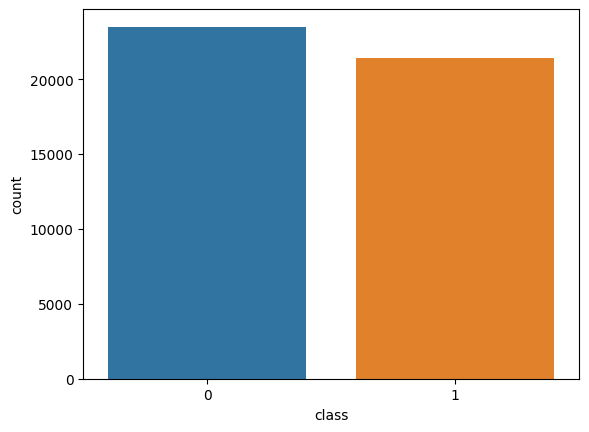

In [ ]:
sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)

In [ ]:
#Number of Words

data['word_count'] = data['text'].apply(lambda x: len(str(x).split(" ")))
data[['text','word_count']].head()

,text,word_count
0,Karma s a bitch or is it the other way around?...,40
1,LONDON (Reuters) - Brexit minister David Davis...,565
2,DUBAI (Reuters) - The Saudi-led military coali...,562
3,(This Aug 31 story corrects location of Burkh...,675
4,(The 18 October 2016 story was refiled to cor...,419


In [ ]:
#Number of characters
#this also includes spaces

data['char_count'] = data['text'].str.len()
data[['text','char_count']].head()

,text,char_count
0,Karma s a bitch or is it the other way around?...,229
1,LONDON (Reuters) - Brexit minister David Davis...,3195
2,DUBAI (Reuters) - The Saudi-led military coali...,3366
3,(This Aug 31 story corrects location of Burkh...,3887
4,(The 18 October 2016 story was refiled to cor...,2520


In [ ]:
#Average Word Length

def avg_word(sentence):
#     print(sentence,end='\n')
    words = sentence.split()
#     print(words)
    if(len(words)!=0):
        print(len(words))
        sum_char=(sum(len(word) for word in words))
        avg = sum_char/len(words)
        return(avg)
    return 0

In [ ]:
data['avg_word'] = data['text'].apply(lambda x: avg_word(x))

39
538
548
655
417
362
134
430
551
131
509
242
300
520
692
474
272
324
530
487
542
406
931
482
771
303
427
180
799
1251
14
158
384
144
579
120
375
343
504
86
464
461
775
69
730
96
201
537
607
416
465
456
399
355
468
436
1081
290
345
353
401
232
423
314
496
442
515
355
127
96
530
357
396
327
200
55
542
551
391
83
237
730
240
343
119
30
58
116
407
990
67
190
752
80
636
90
704
370
412
427
274
361
700
157
202
183
466
465
147
449
476
848
751
84
70
135
325
81
594
439
146
286
310
276
307
333
583
348
400
82
328
276
445
584
341
192
1329
486
370
796
32
579
110
99
331
876
173
492
530
504
338
318
278
190
62
1126
306
671
809
149
55
390
823
190
289
574
316
339
57
132
97
1
161
1001
269
1090
215
328
342
1539
166
598
2268
293
655
533
83
312
1541
1139
448
336
467
669
957
498
61
19
377
518
60
300
703
394
270
117
214
83
542
296
647
10
70
70
415
691
400
140
455
809
523
234
576
388
680
75
203
445
205
74
160
371
109
343
674
430
27
426
160
677
265
305
1171
541
377
107
485
417
478
313
260
393
198
304
400
496
4

437
515
415
144
413
486
251
241
510
381
67
314
876
505
478
845
946
97
723
396
789
390
694
635
79
14
725
379
388
500
228
411
597
552
813
449
587
712
462
453
346
321
297
23
8
274
547
158
595
71
326
318
31
433
674
885
588
344
128
429
178
163
415
729
328
133
395
832
538
55
303
104
584
121
304
762
96
157
330
101
616
509
450
877
407
500
360
449
102
270
87
441
356
275
485
1438
679
414
371
66
245
323
303
90
159
66
325
650
76
362
283
235
419
425
23
565
118
484
262
785
144
329
166
348
783
287
654
373
393
439
410
988
505
1354
25
211
663
3312
305
511
696
611
365
687
456
95
58
467
378
358
32
221
323
510
434
76
148
232
1513
444
420
85
724
85
314
80
113
919
206
1
523
73
402
395
412
652
1
356
680
196
994
31
364
356
97
128
3775
438
207
313
124
82
396
435
504
926
271
276
291
406
278
711
67
128
244
576
428
517
401
458
209
251
1216
310
371
264
268
650
22
367
61
334
869
338
404
464
540
726
333
730
922
353
187
115
404
15
423
375
861
627
359
484
835
3077
479
99
826
94
675
81
2554
426
315
538
539
60
178
362
3

1854
194
451
535
96
124
351
338
1318
102
42
383
146
103
681
503
231
461
410
733
300
241
641
251
279
75
758
679
917
294
753
467
296
309
388
544
199
109
605
387
268
376
67
7
602
270
175
18
868
1186
253
83
865
6
205
97
23
381
188
23
234
308
454
240
107
129
74
320
407
363
382
757
95
270
271
160
230
916
332
128
245
383
840
1003
267
25
553
644
800
28
469
393
725
203
459
358
1992
88
426
465
475
1483
868
303
458
95
329
103
298
439
674
407
363
402
68
576
620
624
6
235
117
482
1228
515
67
80
286
1118
443
130
141
767
422
235
440
603
79
628
385
391
214
300
822
389
614
98
218
453
630
450
226
154
437
380
749
485
43
260
293
244
355
402
872
390
388
638
472
391
33
73
274
514
685
421
183
564
22
418
378
118
13
596
390
368
839
224
456
174
127
774
961
385
269
589
531
279
309
124
1122
383
193
445
183
108
854
46
312
341
342
565
71
159
88
684
320
1714
472
303
299
587
460
237
456
404
330
518
735
502
636
423
331
159
538
483
229
474
476
53
8
312
645
319
609
281
73
85
101
671
493
317
24
348
404
272
668
118
493
49

410
522
578
447
420
240
84
391
18
60
353
429
402
144
466
7
91
368
348
411
202
145
380
79
365
170
271
264
85
352
851
98
536
651
55
470
796
317
397
400
344
295
300
520
642
142
372
47
488
692
408
875
93
285
1251
254
386
978
357
661
542
363
91
385
213
398
494
225
74
165
326
107
397
272
336
183
222
405
833
365
280
204
68
332
21
311
335
700
758
276
748
216
557
847
651
1015
762
202
242
332
579
348
21
538
239
401
503
403
750
420
1052
320
97
509
136
72
807
212
312
84
519
107
343
281
129
364
676
486
329
330
301
361
686
825
580
377
966
385
496
318
818
362
441
496
180
699
445
326
452
738
15
249
295
261
1502
797
457
88
449
531
374
303
874
43
524
84
83
314
497
518
95
1466
566
556
392
506
429
521
481
475
234
396
384
368
220
852
88
191
485
580
274
442
406
83
325
156
45
901
159
1380
432
305
503
113
171
218
102
558
70
333
1140
156
413
793
396
443
494
464
332
1135
145
122
61
468
63
644
411
192
91
203
73
83
86
347
781
358
245
312
676
803
111
151
399
418
527
249
90
287
555
536
184
278
302
346
657
345
57
23

1395
79
99
383
191
901
879
391
367
533
141
107
366
452
965
502
607
349
254
245
257
314
359
472
60
1421
439
647
892
398
576
331
535
960
72
85
919
275
367
375
117
331
332
95
304
200
561
362
361
414
325
66
503
335
407
496
321
422
588
415
268
251
826
370
327
141
419
351
472
279
316
1132
95
28
348
56
348
255
102
213
228
71
265
292
563
395
28
77
441
589
377
73
433
328
82
714
389
218
889
184
355
616
483
326
880
505
558
321
361
315
633
254
134
532
1294
165
116
65
312
560
891
517
140
372
100
163
357
190
194
569
131
813
447
553
814
658
600
357
345
111
91
284
86
557
401
45
323
75
929
359
19
140
449
140
469
28
63
822
336
355
141
428
721
270
561
460
359
640
289
125
472
211
69
687
407
523
582
281
350
328
271
223
426
1
281
264
135
776
240
188
333
806
339
480
766
242
430
239
351
403
96
160
628
450
256
232
391
264
457
267
331
362
448
1005
117
950
518
213
232
222
797
425
68
109
224
598
122
375
434
244
494
107
300
79
226
1258
369
543
595
184
77
723
606
128
472
333
362
93
263
414
55
644
231
113
400
229
28

38
383
405
88
357
417
320
175
818
439
73
291
383
439
735
313
136
331
453
186
158
272
145
410
657
110
102
1525
400
593
442
213
930
928
222
371
370
231
111
58
70
280
303
168
443
401
166
96
331
429
1111
46
445
100
72
393
369
350
264
977
125
592
162
439
338
366
1
854
387
767
218
912
379
1476
528
611
513
101
312
422
94
2061
489
589
318
825
451
806
271
262
486
364
137
450
391
314
118
519
215
309
792
445
883
410
1082
553
328
200
506
122
661
315
328
758
653
577
473
226
135
200
123
53
95
403
1
426
198
383
240
79
372
632
29
344
371
22
1042
345
149
243
87
422
688
899
213
301
801
377
482
111
623
402
378
302
515
214
372
346
313
366
298
104
619
38
124
373
130
227
99
299
350
1647
264
386
381
391
417
619
185
334
423
46
873
420
331
494
324
514
456
780
93
370
325
98
891
388
307
137
1261
411
159
230
270
415
457
52
194
440
125
443
104
34
195
415
269
953
280
364
323
490
386
397
125
335
403
301
800
1208
374
332
140
404
211
299
667
511
136
226
871
371
549
887
865
316
93
73
130
25
249
464
421
812
300
290
309


336
764
74
285
485
419
177
334
338
454
444
365
491
257
141
518
799
141
161
107
700
324
278
413
489
656
183
84
2
341
630
249
146
192
820
675
128
185
271
821
358
642
82
1127
58
488
107
565
483
65
99
492
250
329
781
345
443
227
408
522
545
306
95
369
432
11
78
279
421
434
312
268
393
21
230
93
80
250
308
442
74
626
464
320
402
302
457
440
681
1337
299
377
1301
351
729
578
30
402
443
299
613
394
542
569
348
1022
1173
410
390
880
360
332
213
579
403
680
332
483
403
2034
192
467
1
124
798
1171
135
469
239
574
241
428
653
342
330
278
494
419
516
887
410
110
217
257
286
1576
360
407
788
237
303
819
189
473
239
294
2470
287
2089
865
193
49
74
373
390
1231
575
514
695
883
322
829
338
590
385
581
14
146
557
451
418
173
170
476
484
544
388
446
741
271
605
813
384
367
557
158
118
80
331
77
238
361
320
726
627
294
830
547
795
315
453
495
338
763
759
1171
709
398
48
413
410
288
140
319
454
393
675
949
407
354
177
121
445
64
648
553
1954
666
379
328
442
328
81
314
380
88
555
485
221
1104
470
1
558
129

337
341
373
824
611
604
218
634
782
472
450
734
288
223
51
717
243
153
30
1066
340
97
315
160
652
537
384
613
341
472
147
336
815
565
607
91
103
324
96
94
93
392
322
406
584
194
91
122
282
315
718
154
521
505
403
609
247
248
427
291
314
619
653
226
454
57
321
380
70
279
777
1265
106
812
517
761
22
209
280
578
71
772
552
295
327
102
324
524
368
527
856
516
379
242
1230
934
98
446
388
187
93
772
700
242
96
329
628
861
1451
324
946
255
195
1172
28
187
273
187
972
468
359
466
250
485
198
733
335
13
482
438
508
676
333
1280
587
1
665
1
237
1984
586
47
540
313
544
457
308
343
315
169
51
295
512
473
248
352
126
420
278
859
185
154
410
422
810
563
37
807
688
296
85
38
26
308
319
735
320
282
82
414
201
128
116
123
464
564
425
101
328
396
506
192
78
444
139
429
95
87
150
369
78
501
351
534
1315
598
506
458
1749
213
821
361
942
244
404
227
15
990
62
88
495
325
190
55
173
678
847
544
400
125
64
481
383
1258
564
917
227
697
290
30
548
154
370
340
85
262
166
238
800
193
1172
198
369
68
988
462
472
1

In [ ]:
data

,Unnamed: 0,title,text,subject,date,class,word_count,char_count,avg_word
0,20616,OOPS! HECKLERS FORCE HILLARY OFF Stage In LA A...,Karma s a bitch or is it the other way around?...,left-news,"May 7, 2016",0,40,229,4.871795
1,20701,May's government pushes Brexit bill to avoid '...,LONDON (Reuters) - Brexit minister David Davis...,worldnews,"September 6, 2017",1,565,3195,4.890335
2,15532,"Saudi-led forces close air, sea and land acces...",DUBAI (Reuters) - The Saudi-led military coali...,worldnews,"November 6, 2017",1,562,3366,5.118613
3,20556,"As U.S. ban on travel to North Korea kicks in,...",(This Aug 31 story corrects location of Burkh...,worldnews,"August 31, 2017",1,675,3887,4.905344
4,7766,Trump? Clinton? Many young Americans prefer gi...,(The 18 October 2016 story was refiled to cor...,politicsNews,"October 18, 2016",1,419,2520,5.040767
...,...,...,...,...,...,...,...,...,...
44914,5281,Details emerge of Republicans' plans to replac...,WASHINGTON (Reuters) - Details of potential Ob...,politicsNews,"February 24, 2017",1,575,3570,5.321492
44915,2950,Donald Trump’s New Campaign Slogan Is LITERAL...,"Seriously, he really picked this as his 2020 s...",News,"January 19, 2017",0,368,2061,4.867816
44916,4048,"Trump Freaks Out, Talks ‘World War Three’ (VI...","Donald Trump, increasingly desperate as the el...",News,"October 25, 2016",0,325,1885,5.019293
44917,3521,U.S. Congress' Russia probes expand to Trump's...,WASHINGTON (Reuters) - Congressional investiga...,politicsNews,"May 30, 2017",1,86,560,5.588235


In [ ]:
#Number of stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['text','stopwords']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\starc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,stopwords
0,Karma s a bitch or is it the other way around?...,15
1,LONDON (Reuters) - Brexit minister David Davis...,221
2,DUBAI (Reuters) - The Saudi-led military coali...,188
3,(This Aug 31 story corrects location of Burkh...,247
4,(The 18 October 2016 story was refiled to cor...,135


In [ ]:
#Number of special characters

data['hastags'] = data['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['text','hastags']].head()

,text,hastags
0,Karma s a bitch or is it the other way around?...,0
1,LONDON (Reuters) - Brexit minister David Davis...,0
2,DUBAI (Reuters) - The Saudi-led military coali...,0
3,(This Aug 31 story corrects location of Burkh...,0
4,(The 18 October 2016 story was refiled to cor...,0


In [ ]:
#Number of numerics

data['numerics'] = data['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['text','numerics']].head()

,text,numerics
0,Karma s a bitch or is it the other way around?...,1
1,LONDON (Reuters) - Brexit minister David Davis...,1
2,DUBAI (Reuters) - The Saudi-led military coali...,1
3,(This Aug 31 story corrects location of Burkh...,4
4,(The 18 October 2016 story was refiled to cor...,18


In [ ]:
#Number of Uppercase words

data['upper'] = data['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['text','upper']].head()

,text,upper
0,Karma s a bitch or is it the other way around?...,1
1,LONDON (Reuters) - Brexit minister David Davis...,11
2,DUBAI (Reuters) - The Saudi-led military coali...,3
3,(This Aug 31 story corrects location of Burkh...,13
4,(The 18 October 2016 story was refiled to cor...,2


In [ ]:
data[['text','word_count','char_count','avg_word','stopwords','hastags','numerics','upper' ]].head()

,text,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,Karma s a bitch or is it the other way around?...,40,229,4.871795,15,0,1,1
1,LONDON (Reuters) - Brexit minister David Davis...,565,3195,4.890335,221,0,1,11
2,DUBAI (Reuters) - The Saudi-led military coali...,562,3366,5.118613,188,0,1,3
3,(This Aug 31 story corrects location of Burkh...,675,3887,4.905344,247,0,4,13
4,(The 18 October 2016 story was refiled to cor...,419,2520,5.040767,135,0,18,2


In [ ]:
data[['text','word_count','char_count','avg_word','stopwords','hastags','numerics','upper' ]].tail()

,text,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
44914,WASHINGTON (Reuters) - Details of potential Ob...,575,3570,5.321492,213,0,2,6
44915,"Seriously, he really picked this as his 2020 s...",368,2061,4.867816,147,0,2,3
44916,"Donald Trump, increasingly desperate as the el...",325,1885,5.019293,125,0,0,4
44917,WASHINGTON (Reuters) - Congressional investiga...,86,560,5.588235,33,0,1,5
44918,After 126 years of endorsing Republican candid...,426,2489,4.937799,190,0,1,4


In [ ]:
features = data[['word_count','char_count','avg_word','stopwords','hastags','numerics','upper' ]]

In [ ]:
import numpy as np
features_array = np.asarray(features)

In [ ]:
features_array

array([[4.00000000e+01, 2.29000000e+02, 4.87179487e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.65000000e+02, 3.19500000e+03, 4.89033457e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.10000000e+01],
       [5.62000000e+02, 3.36600000e+03, 5.11861314e+00, ...,
        0.00000000e+00, 1.00000000e+00, 3.00000000e+00],
       ...,
       [3.25000000e+02, 1.88500000e+03, 5.01929260e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.00000000e+00],
       [8.60000000e+01, 5.60000000e+02, 5.58823529e+00, ...,
        0.00000000e+00, 1.00000000e+00, 5.00000000e+00],
       [4.26000000e+02, 2.48900000e+03, 4.93779904e+00, ...,
        0.00000000e+00, 1.00000000e+00, 4.00000000e+00]])

In [ ]:
features_array.shape

(44919, 7)

In [ ]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\starc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\starc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                for token in str(sentence).split()
                                if token not in stopwords.words('english')))

    return preprocessed_text

In [ ]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████████████████████████████████████████████████████████████████████| 44919/44919 [1:06:54<00:00, 11.19it/s]


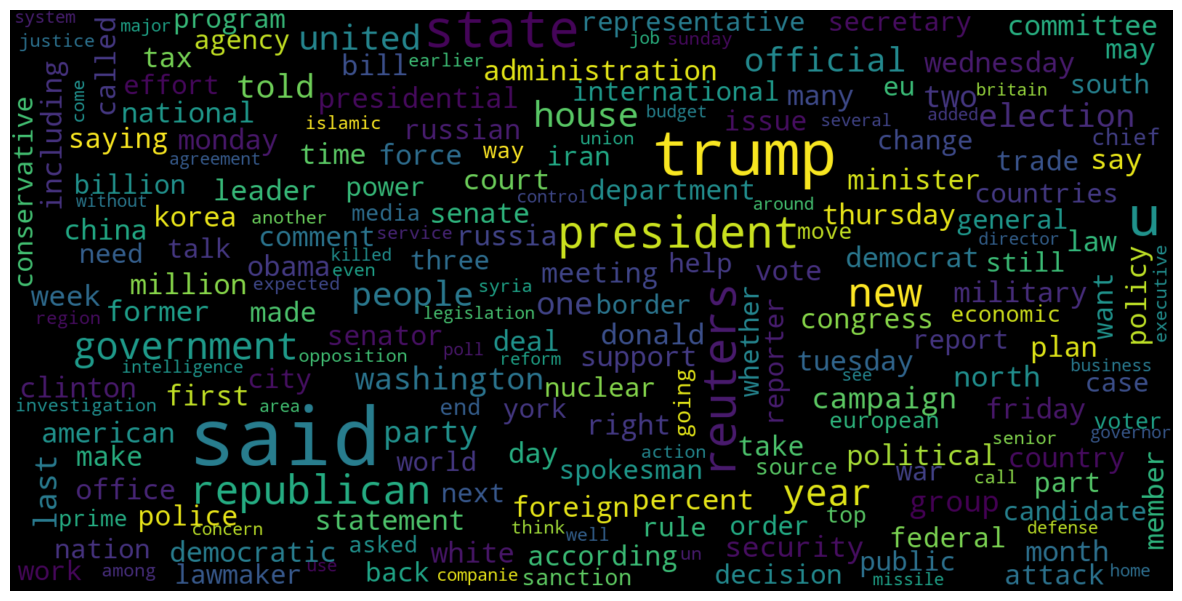

In [ ]:
# Real

consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                    height=800,
                    random_state=21,
                    max_font_size=110,
                    collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

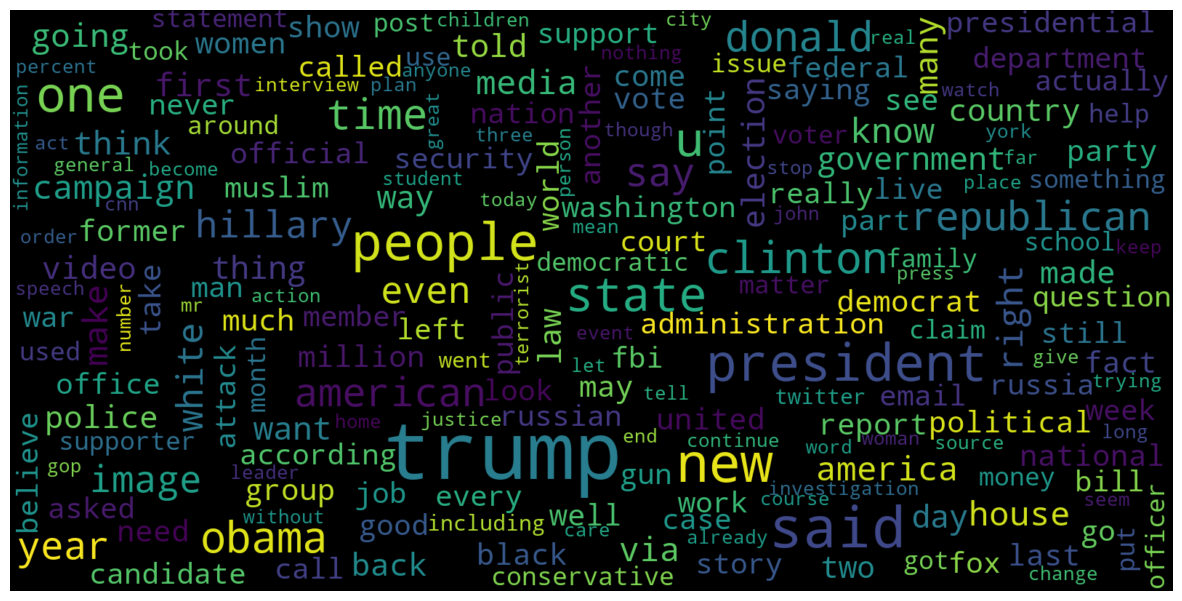

In [ ]:
# Fake

consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                    height=800,
                    random_state=21,
                    max_font_size=110,
                    collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

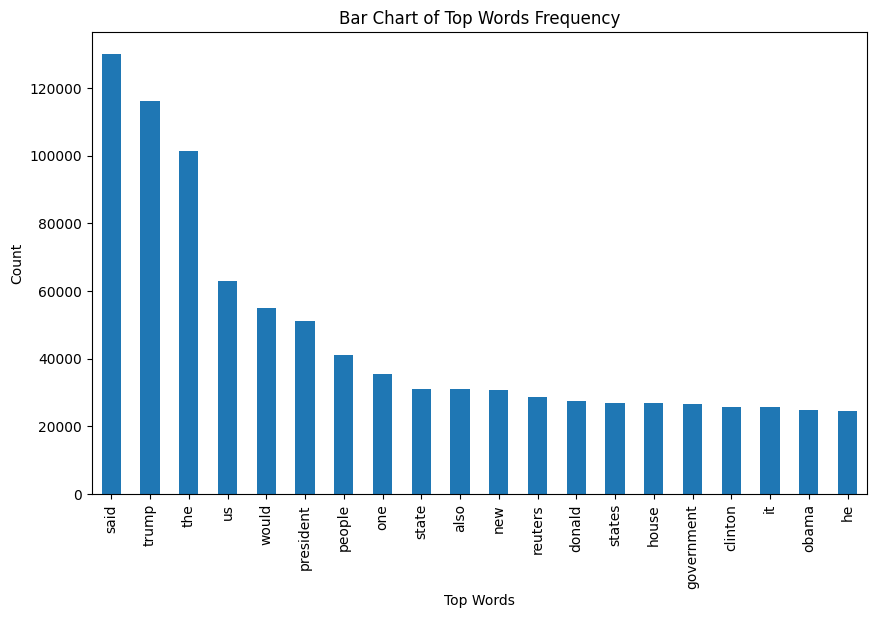

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'], data['class'], test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model

print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

print("Accuracy score =", accuracy_score(y_test, model.predict(x_test)))
print(metrics.classification_report(y_test, model.predict(x_test)))

0.9913027991332483
0.9859305431878895
Accuracy score = 0.9859305431878895
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5837
           1       0.98      0.99      0.99      5393

    accuracy                           0.99     11230
   macro avg       0.99      0.99      0.99     11230
weighted avg       0.99      0.99      0.99     11230



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model

print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

print("Accuracy score =", accuracy_score(y_test, model.predict(x_test)))
print(metrics.classification_report(y_test, model.predict(x_test)))

0.9999703167205913
0.9957257346393589
Accuracy score = 0.9957257346393589
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5837
           1       1.00      1.00      1.00      5393

    accuracy                           1.00     11230
   macro avg       1.00      1.00      1.00     11230
weighted avg       1.00      1.00      1.00     11230



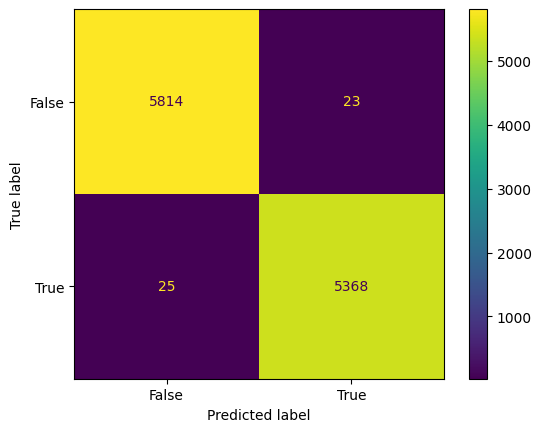

In [ ]:
# Confusion matrix of Results from Decision Tree classification

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.svm import SVC
model_SVM = SVC()
model_SVM=model_SVM.fit(x_train, y_train)
y_pred_SVM = model_SVM.predict(x_test)
print("SVM")
print("Accuracy score =", accuracy_score(y_test, y_pred_SVM))
print(metrics.classification_report(y_test, y_pred_SVM))

SVM
Accuracy score = 0.9933214603739983
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5837
           1       0.99      0.99      0.99      5393

    accuracy                           0.99     11230
   macro avg       0.99      0.99      0.99     11230
weighted avg       0.99      0.99      0.99     11230



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics



from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2, random_state=0)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("random")
print("Accuracy score =", accuracy_score(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))



from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(x_train,y_train)
y_pred_KNN = neigh.predict(x_test)
print("KNN")
print("Accuracy score =", accuracy_score(y_test, y_pred_KNN))
print(metrics.classification_report(y_test, y_pred_KNN ))



# from sklearn.naive_bayes import GaussianNB
# naive = GaussianNB()
# naive.fit(x_train,y_train)
# y_pred_naive = naive.predict(x_test)
# print("Naive Bayes")
# print("Accuracy score =", accuracy_score(y_test, y_pred_naive))
# print(metrics.classification_report(y_test, y_pred_naive ))



# from sklearn.ensemble import GradientBoostingClassifier
# gradient = GradientBoostingClassifier(n_estimators=100,max_depth=None,min_samples_split=2, random_state=0)
# gradient.fit(x_train,y_train)
# y_pred_gradient = gradient.predict(x_test)
# print("Gradient Boosting")
# print("Accuracy score =", accuracy_score(y_test, y_pred_gradient))
# print(metrics.classification_report(y_test, y_pred_gradient ))

In [ ]:
neighbors=[]
n_accuracy=[]
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(x_train,y_train)
    y_pred_KNN = neigh.predict(x_test)
    print("KNN")
#     print("Accuracy score =", accuracy_score(y_test, y_pred_KNN))
    neighbors.append(i)
    n_accuracy.append(accuracy_score(y_test, y_pred_KNN))

print(neighbors)
print(n_accuracy)
print(metrics.classification_report(y_test, y_pred_KNN ))

KNN
KNN
KNN
KNN
KNN
KNN
KNN
KNN
KNN
KNN
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.7263579697239537, 0.6507569011576135, 0.6504007123775601, 0.6163846838824577, 0.6162956366874444, 0.5955476402493322, 0.5956366874443455, 0.5821015138023152, 0.5816562778272485, 0.5730186999109528]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      5842
           1       0.99      0.11      0.20      5388

    accuracy                           0.57     11230
   macro avg       0.77      0.56      0.45     11230
weighted avg       0.76      0.57      0.46     11230



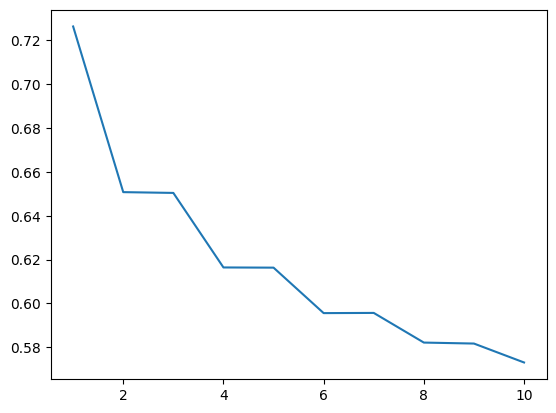

In [ ]:
plt.plot(neighbors,n_accuracy)
plt.show()

In [ ]:
Algorithms = ['LR', 'DT', 'SVM', 'RF', 'KNN']
Accuracy = [0.98, 0.99, 0.99, 0.98, 0.61]

F_Precision = [0.99, 1, 0.99, 0.99, 0.58]
F_Recall = [0.99, 1, 0.99, 0.99, 1]
F_F1Score = [0.99, 1, 0.99, 0.99, 0.73]

NF_Precision = [0.98, 1, 0.99, 0.99, 0.97]
NF_Recall = [0.99, 1, 0.99, 0.99, 0.21]
NF_F1Score = [0.99, 1, 0.99, 0.99, 0.34]

In [ ]:
Result = [['Logistic Regression', 0.98, 0.99, 0.99, 0.99],
          ['Decision Tree', 0.99, 1, 1, 1],
          ['Support Vector Machine', 0.99, 0.99, 0.99, 0.99],
          ['Random Forest', 0.98, 0.99, 0.99, 0.99],
          ['K-Nearest Neighbors', 0.61, 0.58, 1, 0.73]]

Result_df_f = pd.DataFrame(Result, columns=['Algorithms', 'Accuracy', 'Precision', 'Recall', 'F1Score'])

Result_df_f

,Algorithms,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,0.98,0.99,0.99,0.99
1,Decision Tree,0.99,1.00,1.00,1.00
2,Support Vector Machine,0.99,0.99,0.99,0.99
3,Random Forest,0.98,0.99,0.99,0.99
4,K-Nearest Neighbors,0.61,0.58,1.00,0.73


In [ ]:
Result = [['Logistic Regression', 0.98, 0.98, 0.99, 0.99],
          ['Decision Tree', 0.99, 1, 1, 1],
          ['Support Vector Machine', 0.99, 0.99, 0.99, 0.99],
          ['Random Forest', 0.98, 0.99, 0.99, 0.99],
          ['K-Nearest Neighbors', 0.61, 0.58, 1, 0.73]]

Result_df_nf = pd.DataFrame(Result, columns=['Algorithms', 'Accuracy', 'Precision', 'Recall', 'F1Score'])

Result_df_nf

,Algorithms,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,0.98,0.98,0.99,0.99
1,Decision Tree,0.99,1.00,1.00,1.00
2,Support Vector Machine,0.99,0.99,0.99,0.99
3,Random Forest,0.98,0.99,0.99,0.99
4,K-Nearest Neighbors,0.61,0.58,1.00,0.73


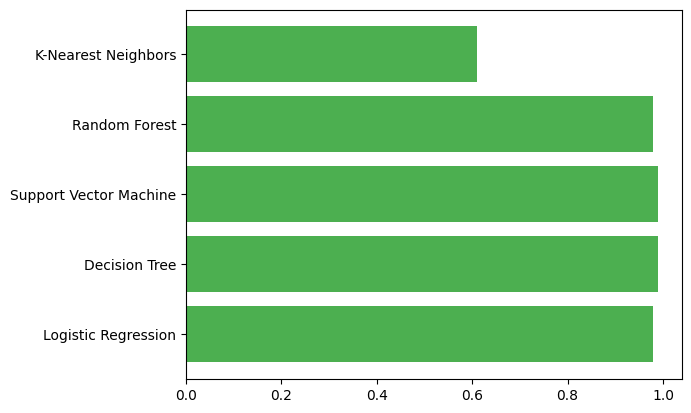

In [ ]:
plt.barh(Result_df_f['Algorithms'], Result_df_f['Accuracy'], color = "#4CAF50")
plt.show()

#color = "#4CAF50"

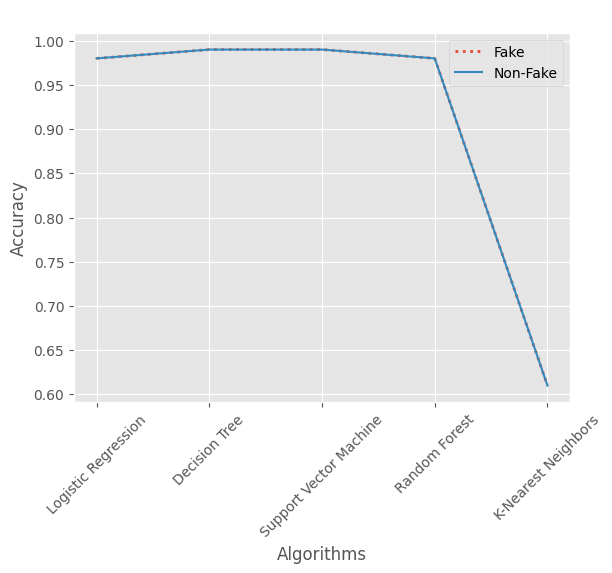

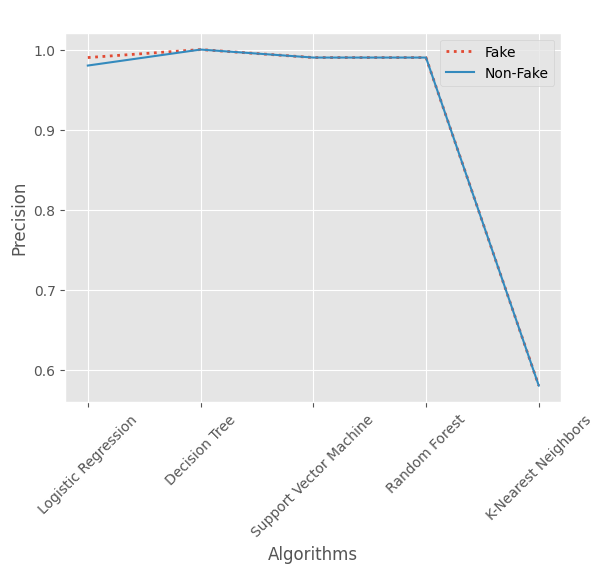

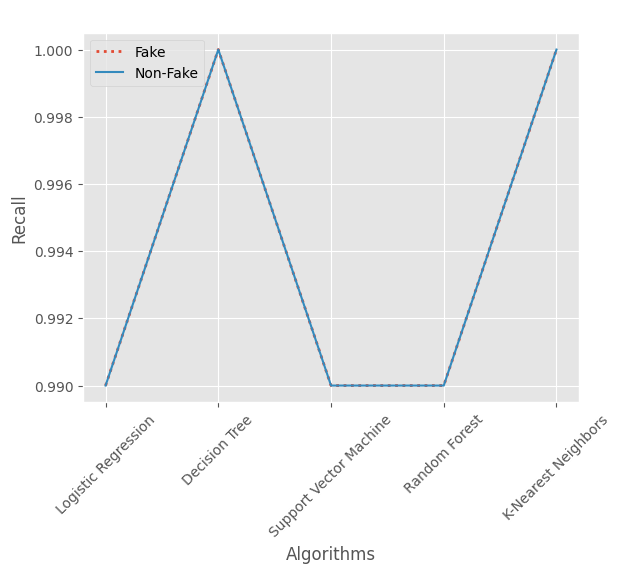

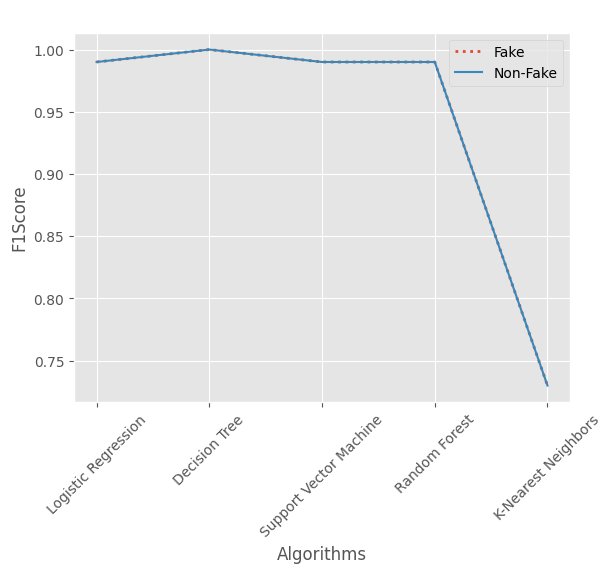

In [ ]:
parameters=['Accuracy','Precision','Recall','F1Score']
for param in parameters:
    x = Result_df_f['Algorithms']
    y = Result_df_f[param]

    a=Result_df_nf['Algorithms']
    b= Result_df_nf[param]
    # first plot with X and Y data
    plt.style.use('ggplot')
    plt.plot(x, y, linestyle=':',linewidth=2)
    plt.plot(a,b)


    plt.xlabel("Algorithms")
    plt.xticks(rotation = 45)
    plt.ylabel(param)
    plt.title(param+ ' Plot')
    plt.legend(['Fake','Non-Fake'],labelcolor='black')
    plt.show()